<a href="https://colab.research.google.com/github/kvame96/NOVIA/blob/main/%22Machine%20Learning%20Methods%22_Assignment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION

# Loading

In [1]:
# Loading
%%capture

from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

google_drive_root = '/content/drive/MyDrive'
assignment_loc = '/Novia//Machine Learning Methods/'
os.chdir(google_drive_root + assignment_loc)
csv_file_name = 'winequality-red.csv'
data = pd.read_csv(csv_file_name)

In [2]:
%%capture

# Display the first few rows of the dataset

from IPython.display import display, HTML

print("First few rows of the dataset:")
display(HTML(data.head().to_html(index=False)))

# Descriptive analysis
print("\nDescriptive statistics of the dataset:")
data_des = data.describe()
display(HTML(data_des.to_html(index=True)))

In [3]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization, excluding 'quality'
numerical_features = data.select_dtypes(include=np.number).columns.drop('quality')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [4]:
%%capture

# Display the first few rows of the standardized dataset
print("\nFirst few rows of the standardized dataset:")
display(HTML(data.head().to_html(index=False)))

# Descriptive analysis of standardized data
print("\nDescriptive statistics of the standardized dataset:")
data_des_scaled = data.describe()
display(HTML(data_des_scaled.to_html(index=True)))

In [5]:
%%capture

# Compute histograms of the standardized data
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Standardized Dataset Features", fontsize=16)  # Add title
plt.tight_layout()
plt.show()

# Classification

You’re trying to predict the wine’s quality score (variable 12) based on its 11 chemical properties (variables 1–11). This is a multiclass classification problem, because quality is a discrete score, typically between 3 and 8 (in practice, not all 0–10 scores appear in the dataset).

In [6]:
# Split the normalized data into training and test set

from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# CLASSIFICATION MODELS

# Evaluation tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- Evaluation for {model_name} ---")

    # Calculate and display accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# To Reset the Parameters

(use it after each model's run to be sure you don't overwrite anything or use previous variables)

In [60]:
# reset & Loading (to be sure that we don't re-use or overwrite previous data)
%%capture
%reset -f

from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

google_drive_root = '/content/drive/MyDrive'
assignment_loc = '/Novia//Machine Learning Methods/'
os.chdir(google_drive_root + assignment_loc)
csv_file_name = 'winequality-red.csv'
data = pd.read_csv(csv_file_name)

################################################################################

# Standardization

from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization, excluding 'quality'
numerical_features = data.select_dtypes(include=np.number).columns.drop('quality')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
data[numerical_features] = scaler.fit_transform(data[numerical_features])

################################################################################

# Split the normalized data into training and test set

from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################################################################################

# CLASSIFICATION MODELS

# Evaluation tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- Evaluation for {model_name} ---")

    # Calculate and display accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# kNN


--- Evaluation for kNN ---
Accuracy: 0.5531

Confusion Matrix for kNN:


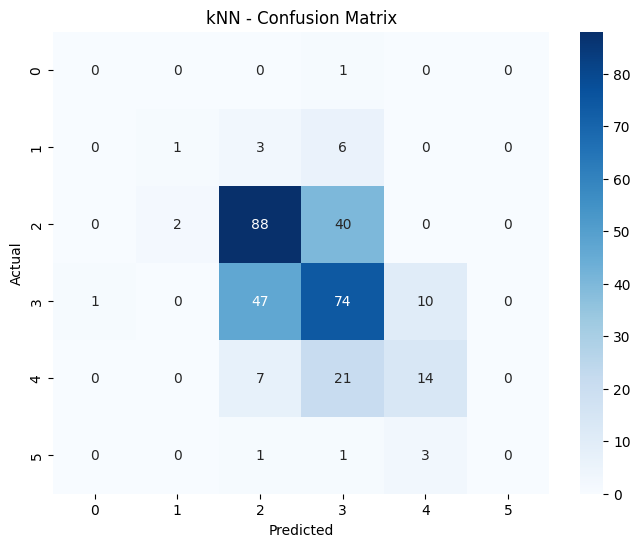


Classification Report for kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.60      0.68      0.64       130
           6       0.52      0.56      0.54       132
           7       0.52      0.33      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.33      0.28      0.29       320
weighted avg       0.54      0.55      0.54       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# 1️⃣ kNN Classifier - n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "kNN")


Best n_neighbors: 1 with accuracy: 0.6188


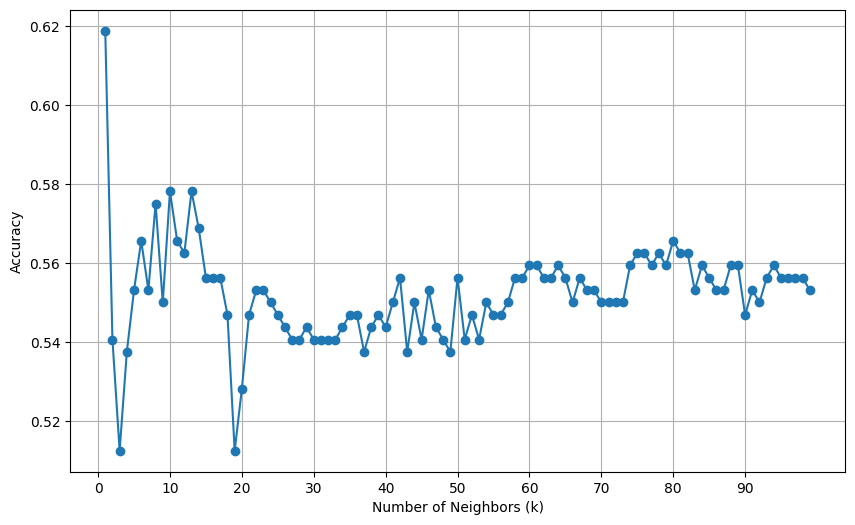

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List to store accuracy for each n_neighbors
accuracy_scores = []
n_neighbors_values = range(1, 100)

for n in n_neighbors_values:
    # Create and train kNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

    #print(f"Accuracy for n_neighbors = {n}: {accuracy:.4f}")

# Find the best n_neighbors
best_n = n_neighbors_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"\nBest n_neighbors: {best_n} with accuracy: {best_accuracy:.4f}")

# Optional: Plot accuracy vs n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(0, 100, 10)) # Display ticks at multiples of 10
plt.grid(True)
plt.show()


--- Evaluation for kNN ---
Accuracy: 0.6188

Confusion Matrix for kNN:


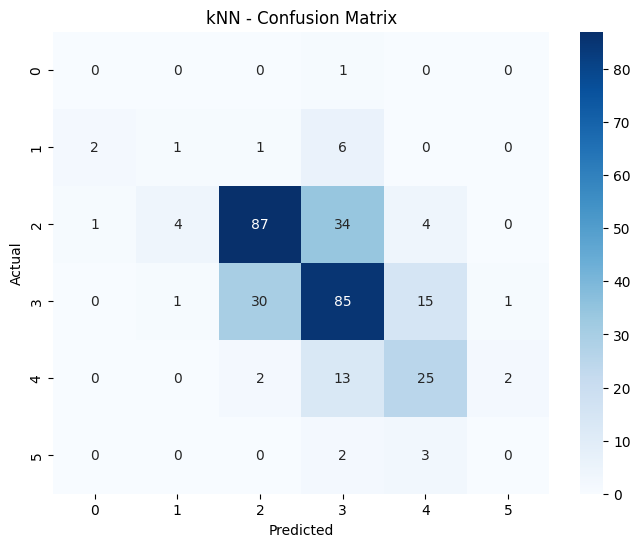


Classification Report for kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.72      0.67      0.70       130
           6       0.60      0.64      0.62       132
           7       0.53      0.60      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.62      0.62      0.62       320



In [11]:
# 1️⃣ kNN Classifier - n_neighbors = 1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "kNN")

#Random Forest


--- Evaluation for Random Forest ---
Accuracy: 0.6500

Confusion Matrix for Random Forest:


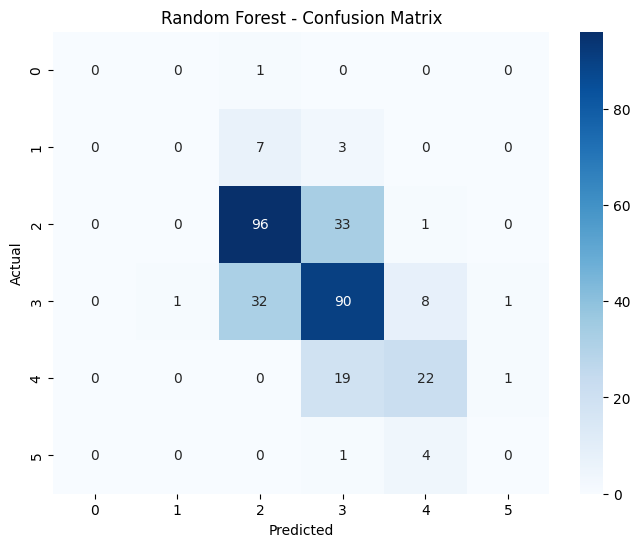


Classification Report for Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# 2️⃣ Random Forest Classifier - n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")


Best n_estimators: 189 with accuracy: 0.6656


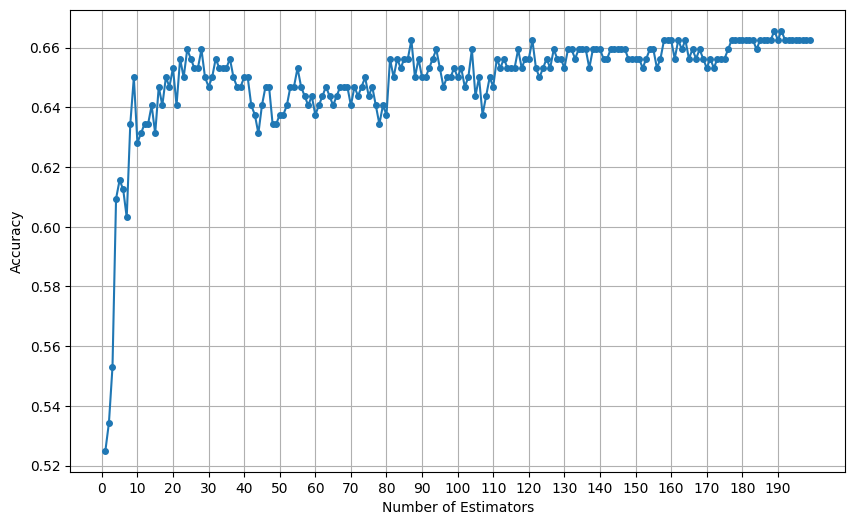

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# List to store accuracy for each n_estimators
accuracy_scores_rf = []
n_estimators_values = range(1, 200)

for n in n_estimators_values:
    # Create and train Random Forest model
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracy_scores_rf.append(accuracy)

    #print(f"Accuracy for n_estimators = {n}: {accuracy:.4f}") # Optional: Print accuracy for each n

# Find the best n_estimators
best_n_estimators = n_estimators_values[np.argmax(accuracy_scores_rf)]
best_accuracy_rf = max(accuracy_scores_rf)

print(f"\nBest n_estimators: {best_n_estimators} with accuracy: {best_accuracy_rf:.4f}")

# Optional: Plot accuracy vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores_rf, marker='o', markersize=4)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(range(0, 200, 10)) # Display ticks at multiples of 20 for better readability
plt.grid(True)
plt.show()

In [14]:
# Best n_estimators in range A<n_estimators<B

# Find the index corresponding to n_estimators = 5 in the n_estimators_values list
start_index = n_estimators_values.index(5)

# Find the index corresponding to n_estimators = 99 in the n_estimators_values list
end_index = n_estimators_values.index(99)

# Get the accuracy scores and n_estimators values within the specified range
accuracy_scores_range = accuracy_scores_rf[start_index : end_index + 1]
n_estimators_range = n_estimators_values[start_index : end_index + 1]

# Find the index of the best accuracy within this range
best_index_in_range = np.argmax(accuracy_scores_range)

# Get the best n_estimators and accuracy within the range
best_n_estimators_range = n_estimators_range[best_index_in_range]
best_accuracy_range = accuracy_scores_range[best_index_in_range]

print(f"Best n_estimators in the range 5 to 99: {best_n_estimators_range} with accuracy: {best_accuracy_range:.4f}")

Best n_estimators in the range 5 to 99: 87 with accuracy: 0.6625



--- Evaluation for Random Forest ---
Accuracy: 0.6625

Confusion Matrix for Random Forest:


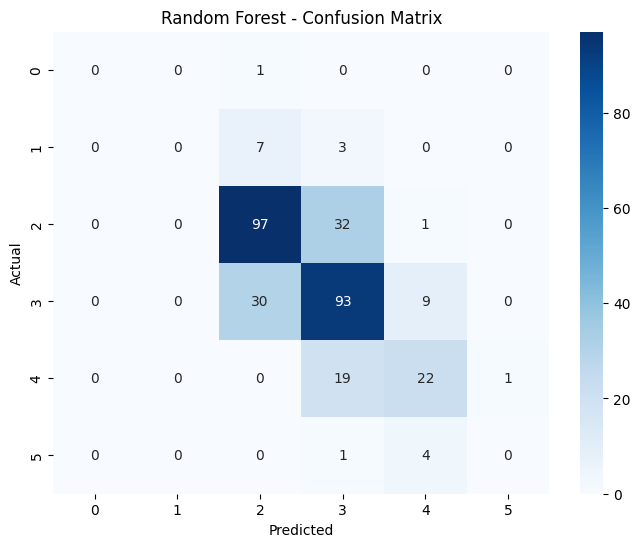


Classification Report for Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.70      0.66       132
           7       0.61      0.52      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.65       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# 2️⃣ Random Forest Classifier - n_estimators = best_n_estimators_range
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators_range, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

#Feature Importance with Random Forest

In [16]:
# Access the feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Get the names of the features
features = X_train.columns

# Create a pandas Series for easier handling and sorting
feature_importance_series = pd.Series(feature_importances, index=features)

# Display the feature importances
print("Feature Importances (Random Forest):")
display(feature_importance_series.sort_values(ascending=False))

Feature Importances (Random Forest):


,0
alcohol,0.149512
sulphates,0.115278
total sulfur dioxide,0.101909
volatile acidity,0.097782
density,0.094998
chlorides,0.080399
pH,0.076271
fixed acidity,0.074513
residual sugar,0.071376
citric acid,0.070375


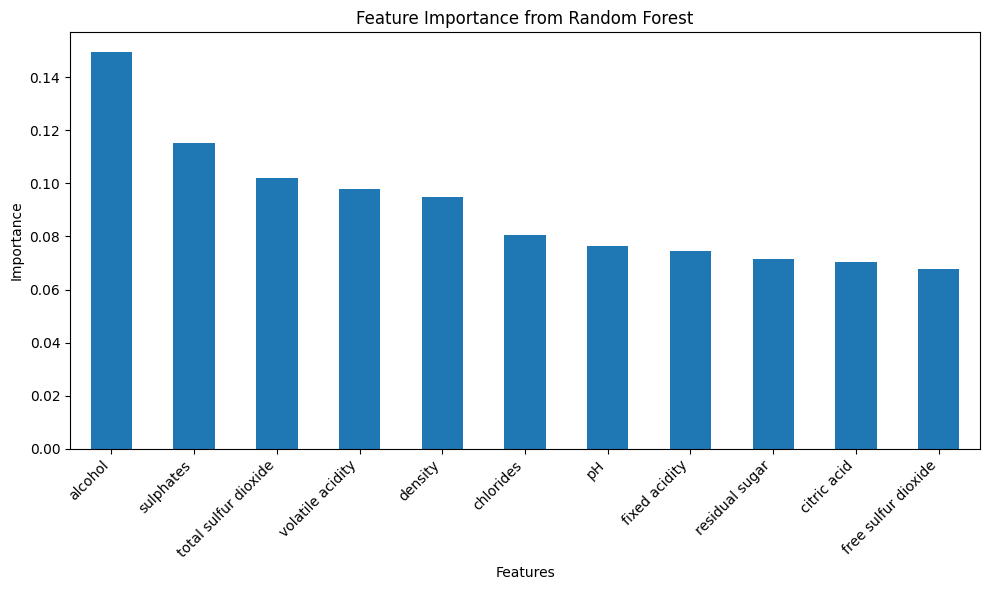

In [17]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importance_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#MLP


--- Evaluation for Neural Network (MLP 64, 32) ---
Accuracy: 0.6438

Confusion Matrix for Neural Network (MLP 64, 32):


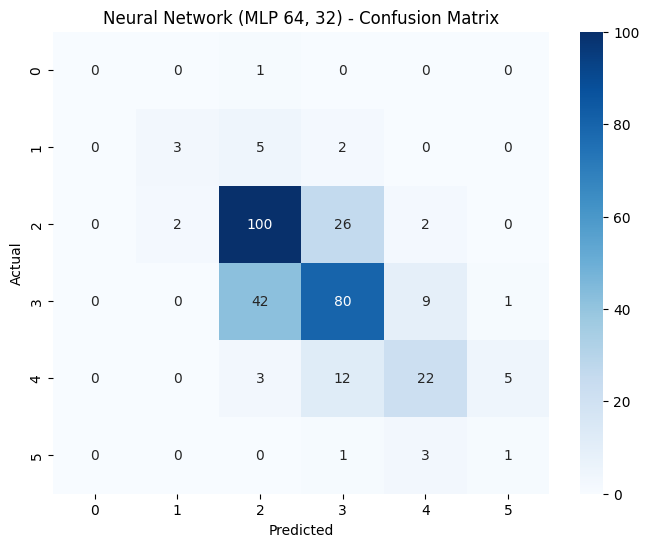


Classification Report for Neural Network (MLP 64, 32):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.60      0.30      0.40        10
           5       0.66      0.77      0.71       130
           6       0.66      0.61      0.63       132
           7       0.61      0.52      0.56        42
           8       0.14      0.20      0.17         5

    accuracy                           0.64       320
   macro avg       0.45      0.40      0.41       320
weighted avg       0.64      0.64      0.64       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# 3️⃣ Neural Network (MLP Classifier)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP 64, 32)")

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define the range of hidden layer sizes
layer_sizes_1 = range(1, 101, 1) # First hidden layer sizes (steps of 10 for faster execution)
layer_sizes_2 = range(1, 101, 1) # Second hidden layer sizes (steps of 10 for faster execution)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results
accuracies = []
sizes_1 = []
sizes_2 = []

# 2. Train MLP models for each combination
print("Training MLP models for different hidden layer sizes...")
for size1 in layer_sizes_1:
    for size2 in layer_sizes_2:
        #print(f"Training with hidden layer sizes: ({size1}, {size2})")
        mlp = MLPClassifier(hidden_layer_sizes=(size1, size2), max_iter=200, random_state=42, early_stopping=True)
        try:
            mlp.fit(X_train, y_train)
            y_pred_mlp = mlp.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_mlp)
            accuracies.append(accuracy)
            sizes_1.append(size1)
            sizes_2.append(size2)
        except Exception as e:
            print(f"Error training MLP with sizes ({size1}, {size2}): {e}")
            accuracies.append(np.nan) # Append NaN for combinations that fail
            sizes_1.append(size1)
            sizes_2.append(size2)

print("Training complete.")

In [ ]:
# Download the results

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'mlp_accuracies': accuracies,
    'mlp_sizes_1': sizes_1,
    'mlp_sizes_2': sizes_2,
}

# Specify the filename
filename = 'MLP_100_100'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [23]:
# Upload the results of the previous analysis

import json

file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/MLP_100_100'
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

accuracies = loaded_data['mlp_accuracies']
sizes_1 = loaded_data['mlp_sizes_1']
sizes_2 = loaded_data['mlp_sizes_2']

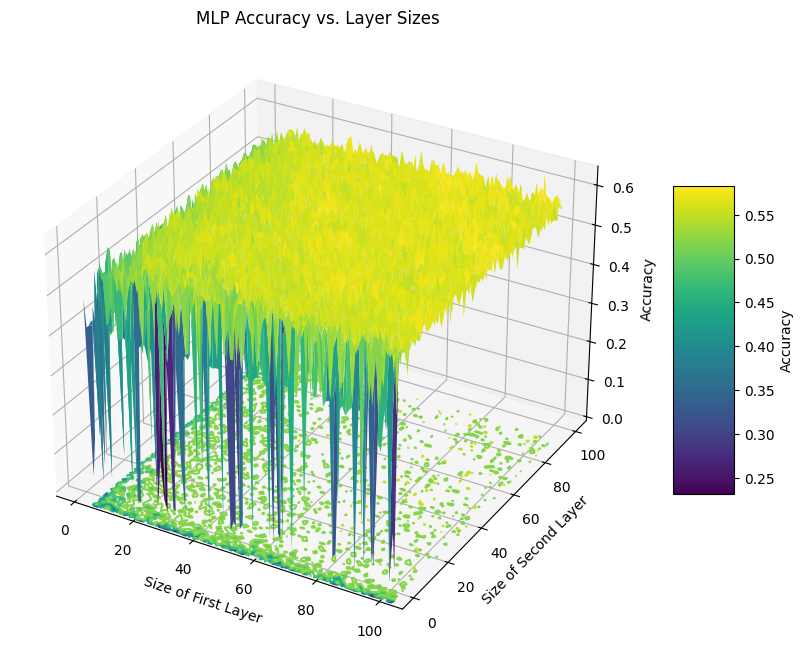

In [24]:
# 3. Prepare data for 3D plotting
X_plot, Y_plot = np.meshgrid(layer_sizes_1, layer_sizes_2)
Z_plot = np.array(accuracies).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# 4. Create the 3D plot with contour lines
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X_plot, Y_plot, Z_plot, cmap='viridis', antialiased=True)
contour = ax.contour(X_plot, Y_plot, Z_plot, levels=10, cmap='viridis', offset=np.min(Z_plot) - 0.05) # Add contour lines below surface

# 5. Add labels and title to the plot
ax.set_xlabel('Size of First Layer')
ax.set_ylabel('Size of Second Layer')
ax.set_zlabel('Accuracy')
ax.set_title('MLP Accuracy vs. Layer Sizes')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Accuracy')

# 6. Display the plot
plt.show()

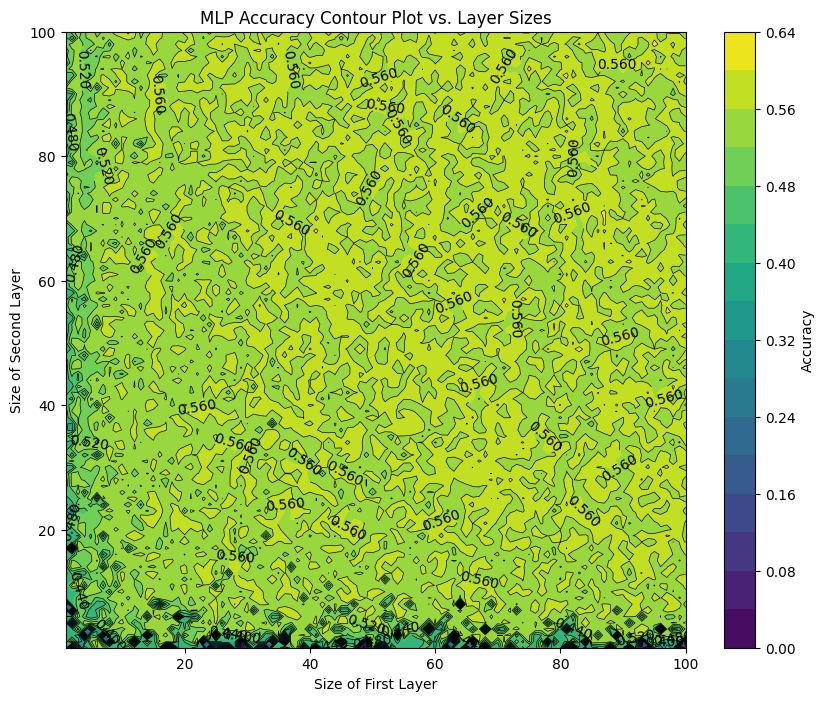

In [25]:
# Contour Lines

import matplotlib.pyplot as plt
import numpy as np
# Prepare data for 2D contour plotting
# Create a grid of sizes for the contour plot
X_contour, Y_contour = np.meshgrid(layer_sizes_1, layer_sizes_2)
Z_contour = np.array(accuracies).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# Create the 2D contour plot
plt.figure(figsize=(10, 8))

# Plot filled contours
contourf = plt.contourf(X_contour, Y_contour, Z_contour, levels=20, cmap='viridis')

# Plot contour lines
contour = plt.contour(X_contour, Y_contour, Z_contour, levels=20, colors='black', linewidths=0.5)

# Add labels to contour lines
plt.clabel(contour, inline=1, fontsize=10, fmt='%1.3f')

# Add labels and title
plt.xlabel('Size of First Layer')
plt.ylabel('Size of Second Layer')
plt.title('MLP Accuracy Contour Plot vs. Layer Sizes')

# Add a color bar
plt.colorbar(contourf, label='Accuracy')

# Display the plot
plt.show()

In [26]:
# Best Accuraacy - size1 and size2 in given interval

import numpy as np

# Function to find best accuracy within a given range
def find_best_accuracy_in_range(accuracies, sizes_1, sizes_2, size1_min, size1_max, size2_min, size2_max, title):
    """
    Finds the best accuracy and corresponding hidden layer sizes within a specified range.

    Args:
        accuracies (list): List of accuracy scores.
        sizes_1 (list): List of first hidden layer sizes.
        sizes_2 (list): List of second hidden layer sizes.
        size1_min (int): Minimum value for size1 (exclusive).
        size1_max (int): Maximum value for size1 (exclusive).
        size2_min (int): Minimum value for size2 (exclusive).
        size2_max (int): Maximum value for size2 (exclusive).
        title (str): Title for the output.

    Returns:
        None: Prints the best accuracy and sizes, or a message if no data is found.
    """
    accuracies_filtered = []
    sizes_1_filtered = []
    sizes_2_filtered = []

    for i in range(len(accuracies)):
        if size1_min < sizes_1[i] < size1_max and size2_min < sizes_2[i] < size2_max:
            # Check for NaN values before appending
            if not np.isnan(accuracies[i]):
                accuracies_filtered.append(accuracies[i])
                sizes_1_filtered.append(sizes_1[i])
                sizes_2_filtered.append(sizes_2[i])

    print(f"\n{title}:")
    if accuracies_filtered:
        # Find the index of the maximum accuracy in the filtered list
        best_index_filtered = np.argmax(accuracies_filtered)

        # Get the best size1, size2, and accuracy from the filtered list
        best_size1_range = sizes_1_filtered[best_index_filtered]
        best_size2_range = sizes_2_filtered[best_index_filtered]
        best_accuracy_range = accuracies_filtered[best_index_filtered]

        print(f"Best size1: {best_size1_range}")
        print(f"Best size2: {best_size2_range}")
        print(f"Best accuracy: {best_accuracy_range:.4f}")
    else:
        print("No data points found within the specified range.")

# Find best accuracy for the first interval: 25 < size1 < 65 and 25 < size2 < 65
find_best_accuracy_in_range(accuracies, sizes_1, sizes_2, 25, 65, 25, 65, "Best Accuracy for 25 < size1 < 65 and 25 < size2 < 65")

# Find best accuracy for the second interval: 1 < size1 < 101 and 1 < size2 < 101
find_best_accuracy_in_range(accuracies, sizes_1, sizes_2, 1, 101, 1, 101, "Best Accuracy for 1 < size1 < 101 and 1 < size2 < 101")


Best Accuracy for 25 < size1 < 65 and 25 < size2 < 65:
Best size1: 40
Best size2: 49
Best accuracy: 0.6094

Best Accuracy for 1 < size1 < 101 and 1 < size2 < 101:
Best size1: 95
Best size2: 98
Best accuracy: 0.6344



--- Evaluation for Neural Network (MLP 95, 98) ---
Accuracy: 0.6594

Confusion Matrix for Neural Network (MLP 95, 98):


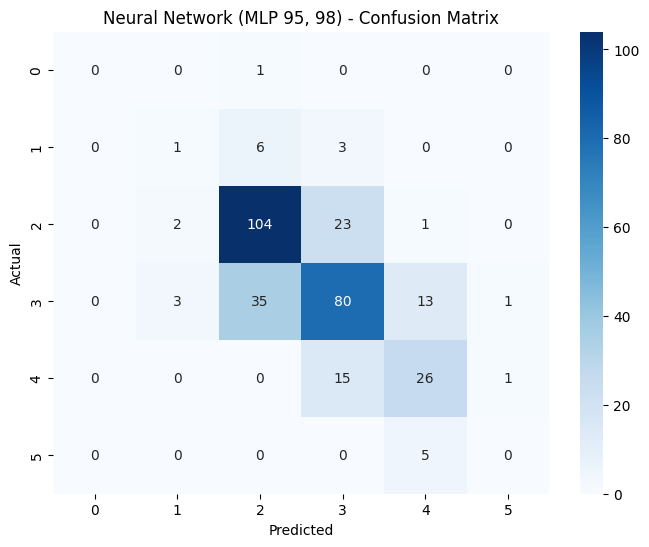


Classification Report for Neural Network (MLP 95, 98):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.71      0.80      0.75       130
           6       0.66      0.61      0.63       132
           7       0.58      0.62      0.60        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.64      0.66      0.65       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# 3️⃣ Neural Network (MLP Classifier) - best layers
from sklearn.neural_network import MLPClassifier

mlp_best = MLPClassifier(hidden_layer_sizes=(95, 98), max_iter=10000, random_state=42)
mlp_best.fit(X_train, y_train)
y_pred_mlp_best = mlp_best.predict(X_test)
evaluate_model(y_test, y_pred_mlp_best, "Neural Network (MLP 95, 98)")

Calculating Permutation Importance...

Permutation Importance (MLP):


,0
chlorides,0.031875
total sulfur dioxide,0.062500
residual sugar,0.068750
free sulfur dioxide,0.091563
pH,0.096250
volatile acidity,0.108750
citric acid,0.112813
density,0.120313
sulphates,0.120938
fixed acidity,0.136250


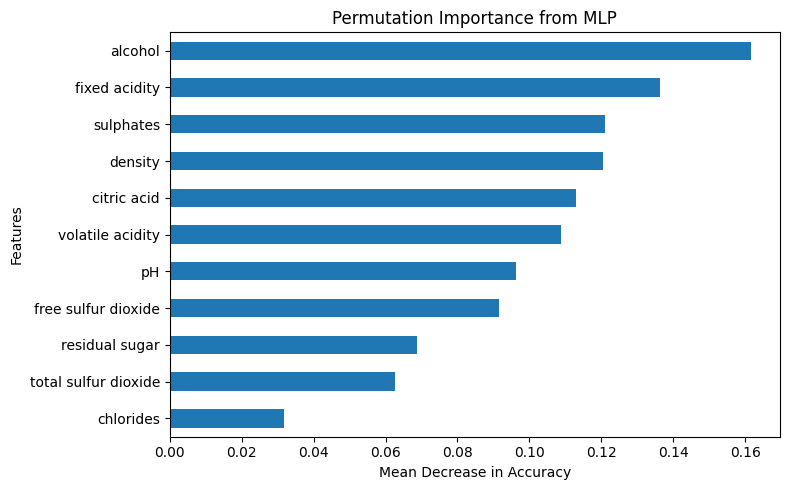

In [28]:
# Permutation Importance

from sklearn.inspection import permutation_importance

print("Calculating Permutation Importance...")
result = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the importance scores and feature names
sorted_idx = result.importances_mean.argsort()
feature_importances_permutation = pd.Series(result.importances_mean[sorted_idx], index=X_test.columns[sorted_idx])

# Display the feature importances
print("\nPermutation Importance (MLP):")
display(feature_importances_permutation)

# Visualize feature importances
plt.figure(figsize=(8, 5))
feature_importances_permutation.plot(kind='barh')
plt.title("Permutation Importance from MLP")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#DNN - First Attempt


--- Evaluation for Deep Neural Network (DNN) (128, 64, 32) ---
Accuracy: 0.5625

Confusion Matrix for Deep Neural Network (DNN) (128, 64, 32):


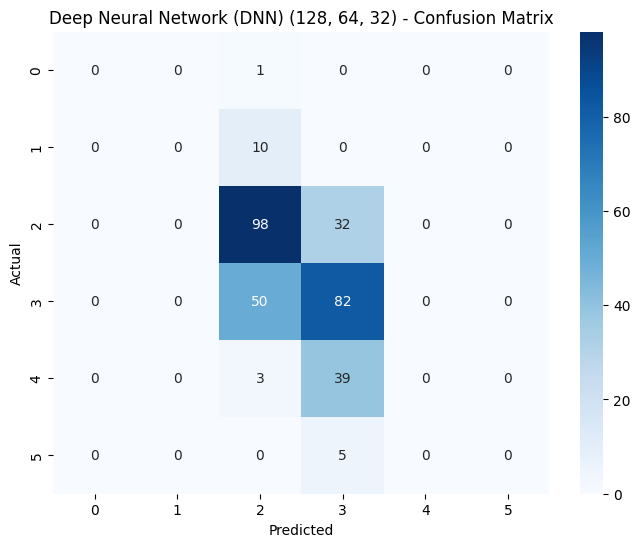


Classification Report for Deep Neural Network (DNN) (128, 64, 32):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.75      0.67       130
           6       0.52      0.62      0.57       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.46      0.56      0.51       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# 4️⃣ Deep Neural Network (DNN Classifier)
from sklearn.neural_network import MLPClassifier

# Using more hidden layers for a deeper network
dnn = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network (DNN) (128, 64, 32)")

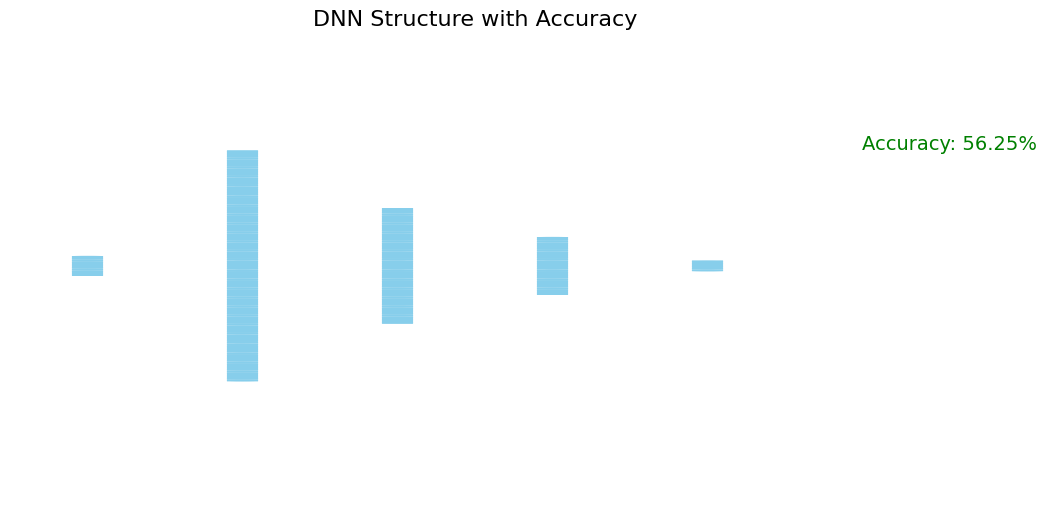

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Fit your model
from sklearn.neural_network import MLPClassifier

dnn = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dnn)

# Get layer sizes
input_size = X_train.shape[1]
output_size = len(set(y_train))
layer_sizes = [input_size, 128, 64, 32, output_size]

# Draw the network
def draw_dnn_structure(layer_sizes, accuracy):
    fig, ax = plt.subplots(figsize=(12, 6))
    layer_positions = list(range(len(layer_sizes)))

    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            circle = plt.Circle((layer_positions[i] * 2, j - layer_size / 2), 0.2, color='skyblue')
            ax.add_patch(circle)

    ax.text(2 * len(layer_sizes), max(layer_sizes) / 2, f"Accuracy: {accuracy:.2%}",
            fontsize=14, color='green', ha='left')

    ax.set_xlim(-1, 2 * len(layer_sizes) + 1)
    ax.set_ylim(-layer_sizes[1], layer_sizes[1])
    ax.axis('off')
    plt.title("DNN Structure with Accuracy", fontsize=16)
    plt.show()

draw_dnn_structure(layer_sizes, accuracy)

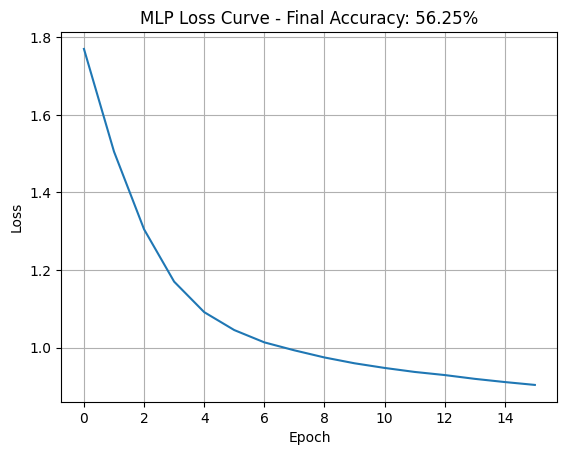

In [32]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Train the model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train, y_train)

# Predict and calculate final accuracy
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.title(f"MLP Loss Curve - Final Accuracy: {accuracy:.2%}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


#DNN - search in range(10, 151, 20)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score # Import accuracy_score

# Define the range for hidden layer sizes A, B, and C
layer_sizes_range = range(10, 151, 20)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results for the scatter plot
accuracies_3d = []
sizes_A = []
sizes_B = []
sizes_C = []

print("Training MLP models for different 3-layer hidden layer sizes...")

# Iterate through all combinations of A, B, and C
for size_a in layer_sizes_range:
  for size_b in layer_sizes_range:
    for size_c in layer_sizes_range:
      #print(f"Training with hidden layer sizes: ({size_a}, {size_b}, {size_c})")
      # Create and train the MLPClassifier with the current hidden layer sizes
      mlp_3layer = MLPClassifier(hidden_layer_sizes=(size_a, size_b, size_c), max_iter=500, random_state=42, early_stopping=True)
      try:
        mlp_3layer.fit(X_train, y_train)
        y_pred_mlp_3layer = mlp_3layer.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_mlp_3layer)

        # Store the results
        accuracies_3d.append(accuracy)
        sizes_A.append(size_a)
        sizes_B.append(size_b)
        sizes_C.append(size_c)

      except Exception as e:
        print(f"Error training MLP with sizes ({size_a}, {size_b}, {size_c}): {e}")
        # Optionally store NaN or skip this combination if training fails
        # accuracies_3d.append(np.nan)
        # sizes_A.append(size_a)
        # sizes_B.append(size_b)
        # sizes_C.append(size_c)

print("Training complete.")

In [ ]:
# Download the results

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'accuracies_3d': accuracies_3d,
    'sizes_A': sizes_A,
    'sizes_B': sizes_B,
    'sizes_C': sizes_C,
}

# Specify the filename
filename = 'DNN_10_151_20'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [35]:
# Upload the results of the previous analysis

import json

file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/DNN_10_151_20'
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

accuracies_3d = loaded_data['accuracies_3d']
sizes_A = loaded_data['sizes_A']
sizes_B = loaded_data['sizes_B']
sizes_C = loaded_data['sizes_C']

In [36]:
import numpy as np
# Find the index of the maximum accuracy
best_accuracy_index = np.argmax(accuracies_3d)

# Get the best accuracy and corresponding hidden layer sizes
best_accuracy_3d = accuracies_3d[best_accuracy_index]
best_size_A = sizes_A[best_accuracy_index]
best_size_B = sizes_B[best_accuracy_index]
best_size_C = sizes_C[best_accuracy_index]

print(f"Best accuracy for the 3-layer MLP: {best_accuracy_3d:.4f}")
print(f"Associated hidden_layer_sizes: ({best_size_A}, {best_size_B}, {best_size_C})")


Best accuracy for the 3-layer MLP: 0.6469
Associated hidden_layer_sizes: (130, 70, 150)


In [38]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(x=sizes_A, y=sizes_B, z=sizes_C, color=accuracies_3d,
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'Accuracy'},
                    title='MLP Accuracy vs. Three Layer Sizes (Interactive)',
                    color_continuous_scale='viridis') # Added viridis colormap

# Update the layout to make the window taller
fig.update_layout(height=700, width=1200) # You can adjust the height value as needed

fig.show()

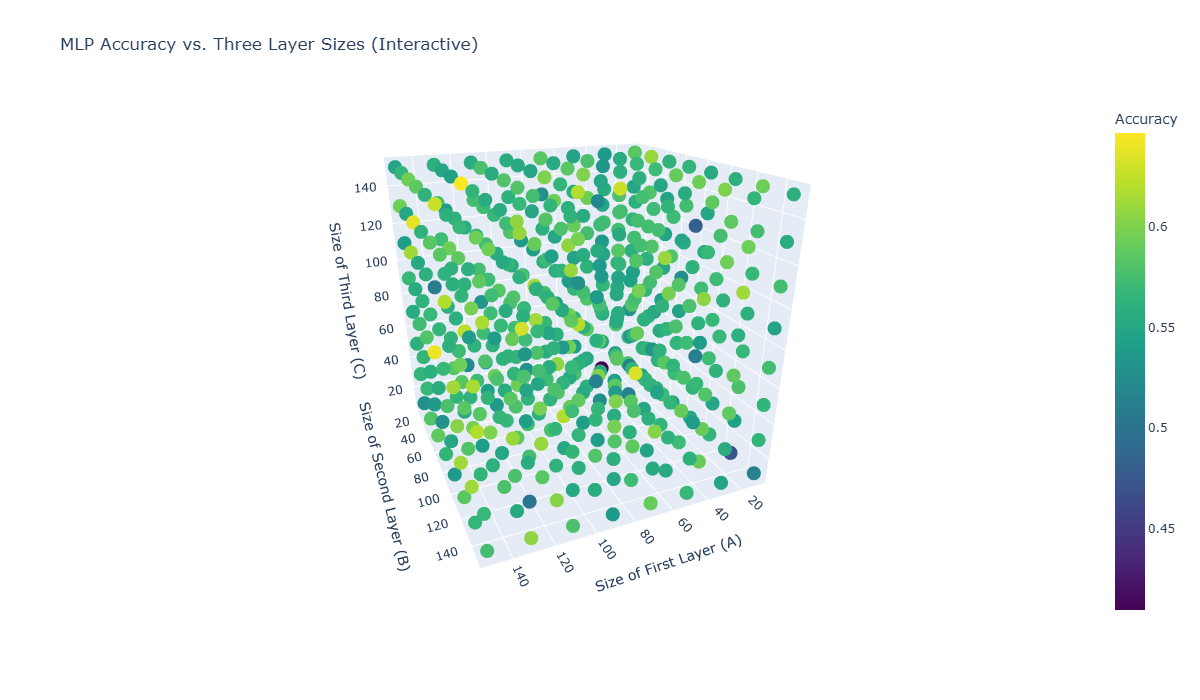

In [39]:
# Display the saved screenshot
from IPython.display import Image

temp_img_path = '/content/drive/MyDrive//Novia//Machine Learning Methods/temp_image.png'
display(Image(temp_img_path))


--- Evaluation for Deep Neural Network (DNN) (130, 70, 150) ---
Accuracy: 0.6469

Confusion Matrix for Deep Neural Network (DNN) (130, 70, 150):


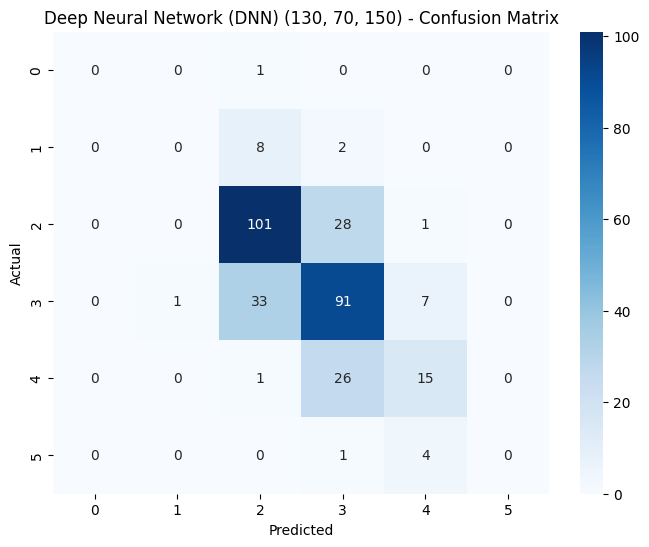


Classification Report for Deep Neural Network (DNN) (130, 70, 150):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.78      0.74       130
           6       0.61      0.69      0.65       132
           7       0.56      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.31      0.30      0.30       320
weighted avg       0.61      0.65      0.62       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
# 4️⃣ Deep Neural Network (DNN Classifier)
from sklearn.neural_network import MLPClassifier

# Using more hidden layers for a deeper network
dnn = MLPClassifier(hidden_layer_sizes=(130, 70, 150), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network (DNN) (130, 70, 150)")

#DNN - search near (130, 70, 150) in range 10 neurons and step of 1

In [42]:
import numpy as np
# Using the code provided, perform a research around the value of the layer (70, 130, 70)
# with a step of 1 between neurons for each layer.

# Define the range for hidden layer sizes around (70, 130, 70) with a step of 1
layer_sizes_A_research = range(120, 150, 1)
layer_sizes_B_research = range(60, 80, 1)
layer_sizes_C_research = range(140, 160, 1)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################
from sklearn.neural_network import MLPClassifier

# Lists to store results for the scatter plot in the research area
accuracies_research = []
sizes_A_research_list = []
sizes_B_research_list = []
sizes_C_research_list = []

print("Training MLP models for research area around (130, 70, 150) with step 1...")

# Iterate through all combinations of A, B, and C in the research area
for size_a in layer_sizes_A_research:
  for size_b in layer_sizes_B_research:
    for size_c in layer_sizes_C_research:
      #print(f"Training with hidden layer sizes: ({size_a}, {size_b}, {size_c})")
      # Create and train the MLPClassifier with the current hidden layer sizes
      mlp_3layer_research = MLPClassifier(hidden_layer_sizes=(size_a, size_b, size_c), max_iter=500, random_state=42, early_stopping=True)
      try:
        mlp_3layer_research.fit(X_train, y_train)
        y_pred_mlp_3layer_research = mlp_3layer_research.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_mlp_3layer_research)

        # Store the results
        accuracies_research.append(accuracy)
        sizes_A_research_list.append(size_a)
        sizes_B_research_list.append(size_b)
        sizes_C_research_list.append(size_c)

      except Exception as e:
        print(f"Error training MLP with sizes ({size_a}, {size_b}, {size_c}): {e}")
        # Optionally store NaN or skip this combination if training fails
        accuracies_research.append(np.nan)
        sizes_A_research_list.append(size_a)
        sizes_B_research_list.append(size_b)
        sizes_C_research_list.append(size_c)

print("Training complete for research area.")

In [ ]:
# Download the results

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'accuracies_research': accuracies_research,
    'sizes_A_research_list': sizes_A_research_list,
    'sizes_B_research_list': sizes_B_research_list,
    'sizes_C_research_list': sizes_C_research_list
}

# Specify the filename
filename = 'DNN_130_70_150'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [43]:
# Upload the results of the previous analysis

import json

file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/DNN_130_70_150'
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

accuracies_research = loaded_data['accuracies_research']
sizes_A_research_list = loaded_data['sizes_A_research_list']
sizes_B_research_list = loaded_data['sizes_B_research_list']
sizes_C_research_list = loaded_data['sizes_C_research_list']

In [44]:
# Find the index of the maximum accuracy in the research area
if accuracies_research:
    best_accuracy_index_research = np.argmax(accuracies_research)

    # Get the best accuracy and corresponding hidden layer sizes in the research area
    best_accuracy_research = accuracies_research[best_accuracy_index_research]
    best_size_A_research = sizes_A_research_list[best_accuracy_index_research]
    best_size_B_research = sizes_B_research_list[best_accuracy_index_research]
    best_size_C_research = sizes_C_research_list[best_accuracy_index_research]

    print(f"\nBest accuracy in the research area: {best_accuracy_research:.4f}")
    print(f"Associated hidden_layer_sizes in the research area: ({best_size_A_research}, {best_size_B_research}, {best_size_C_research})")


Best accuracy in the research area: 0.6656
Associated hidden_layer_sizes in the research area: (138, 71, 153)


In [46]:
# Create an interactive 3D scatter plot for the research area using Plotly
import plotly.express as px

fig_research = px.scatter_3d(x=sizes_A_research_list, y=sizes_B_research_list, z=sizes_C_research_list, color=accuracies_research,
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'Accuracy'},
                    title='MLP Accuracy vs. Three Layer Sizes (Research Area)',
                    color_continuous_scale='viridis') # Added viridis colormap

# Update the layout to make the window taller
fig_research.update_layout(height=700, width=1200) # You can adjust the height value as needed

fig_research.show()

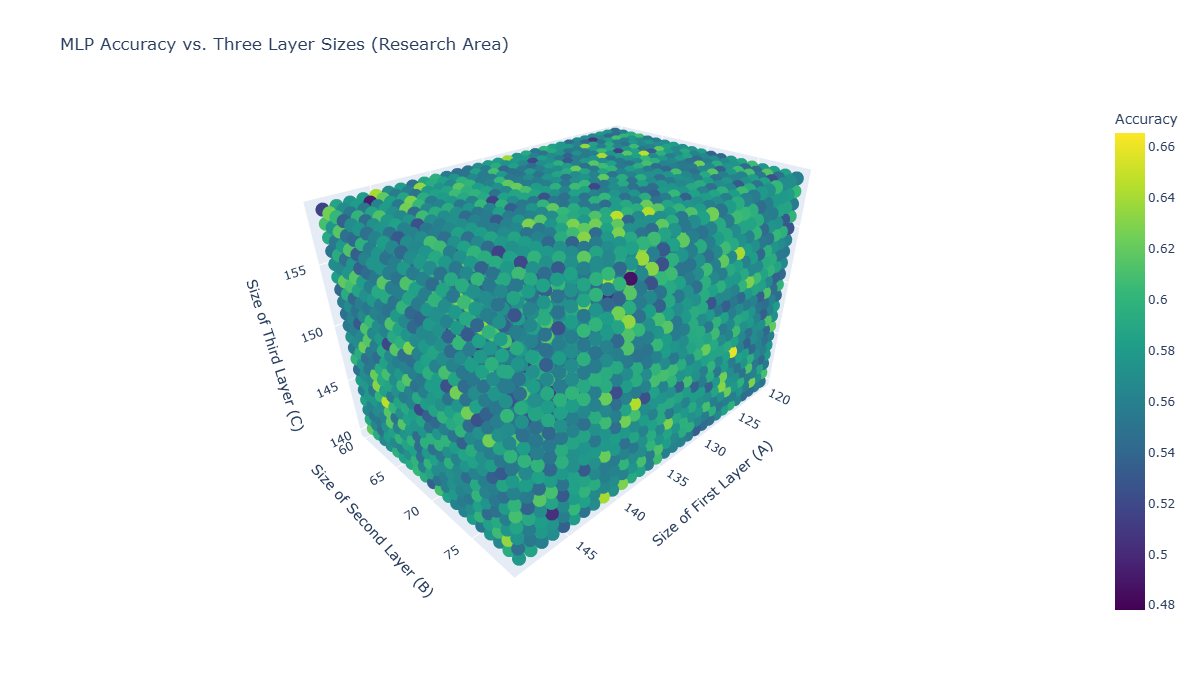

In [51]:
# Display the saved screenshot
from IPython.display import Image

temp_img_path = '/content/drive/MyDrive//Novia//Machine Learning Methods/temp_image.png'
display(Image(temp_img_path))


--- Evaluation for Deep Neural Network (DNN) (138, 71, 153) ---
Accuracy: 0.6656

Confusion Matrix for Deep Neural Network (DNN) (138, 71, 153):


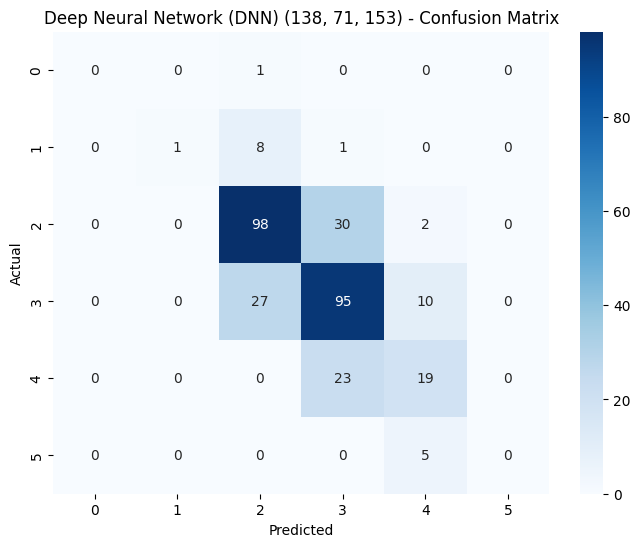


Classification Report for Deep Neural Network (DNN) (138, 71, 153):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.73      0.75      0.74       130
           6       0.64      0.72      0.68       132
           7       0.53      0.45      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.48      0.34      0.35       320
weighted avg       0.66      0.67      0.65       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [52]:
# 4️⃣ Deep Neural Network (DNN Classifier)
from sklearn.neural_network import MLPClassifier

# Using more hidden layers for a deeper network
dnn = MLPClassifier(hidden_layer_sizes=(138, 71, 153), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network (DNN) (138, 71, 153)")

# CNN

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




CNN Test Accuracy: 0.5688
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--- Evaluation for CNN ---
Accuracy: 0.5687

Confusion Matrix for CNN:


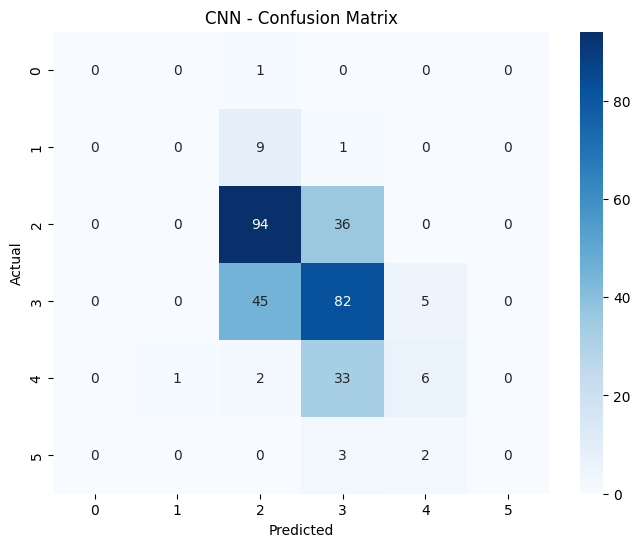


Classification Report for CNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.72      0.67       130
           6       0.53      0.62      0.57       132
           7       0.46      0.14      0.22        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.27      0.25      0.24       320
weighted avg       0.53      0.57      0.54       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [54]:
# 5️⃣ Convolutional Neural Network (CNN)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CNNs typically work with data that has a spatial structure.
# For tabular data, we can treat features as a 1D sequence.
# We also need to reshape the input data to be 3D (samples, timesteps, features)

# Convert target variable to one-hot encoding for Keras
# Need to adjust the number of categories based on the actual quality levels in the data
# Get unique quality levels and map them to integers starting from 0


# Define some of the hyperparameters
filters1 = 32
filters2 = 64
kernel_size1 = 2
kernel_size2 = 2
#activation
rate1 = 0.5
rate2 = 0.5
n_neurons_fist_dense_layer = 100
epochs_hist = 50
batch_size_hist = 32



# Convert the original wine quality scores (y) into numerical labels starting from 0 and then into a one-hot encoded format. This is necessary because Keras's categorical cross-entropy loss function expects the target variable to be in this format for multi-class classification.

unique_quality_levels = sorted(y.unique())
quality_map = {level: i for i, level in enumerate(unique_quality_levels)}

y_train_mapped = y_train.map(quality_map)
y_test_mapped = y_test.map(quality_map)

y_train_onehot = to_categorical(y_train_mapped, num_classes=len(unique_quality_levels))
y_test_onehot = to_categorical(y_test_mapped, num_classes=len(unique_quality_levels))


# Reshape data for CNN (add a channel dimension)
# CNNs, especially Conv1D used here, expect input data to have a specific shape: (samples, timesteps, features). Since your data is tabular, it's initially 2D (samples, features). This code reshapes the data by adding a third dimension of size 1, effectively treating each feature as a single timestep.
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
# Architecture of the CNN using Keras's Sequential API:

# Initializes a linear stack of layers
cnn = Sequential()
# Conv1D(): This is the 1D convolutional layer. It applies a set of filters to the input data to learn local patterns. filters is the number of filters, kernel_size is the size of the convolutional window, and activation='relu' is the activation function. input_shape is specified for the first layer to tell the model the shape of the input data
cnn.add(Conv1D(filters1, kernel_size1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
# This layer randomly sets a fraction (0.5 or 50%) of the input units to 0 during training. This helps prevent overfitting
cnn.add(Dropout(rate1))
cnn.add(Conv1D(filters2, kernel_size2, activation='relu'))
cnn.add(Dropout(rate2))
# This layer flattens the output of the convolutional layers into a 1D vector, which can then be fed into dense layers
cnn.add(Flatten())
# Dense(): These are fully connected layers. The first dense layer has 100 neurons with ReLU activation. The final dense layer has a number of neurons equal to the number of unique quality levels and uses a softmax activation function. Softmax ensures that the output is a probability distribution over the classes
cnn.add(Dense(n_neurons_fist_dense_layer, activation='relu'))
cnn.add(Dense(len(unique_quality_levels), activation='softmax')) # Output layer with softmax for multiclass

# Compile the model usign Adam algorithm and loss function used for multi-class classification with one-hot encoded labels
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train_cnn, y_train_onehot, epochs_hist, batch_size_hist, validation_data=(X_test_cnn, y_test_onehot), verbose=0)

# Evaluate the model
loss, accuracy = cnn.evaluate(X_test_cnn, y_test_onehot, verbose=0)
print(f"\nCNN Test Accuracy: {accuracy:.4f}")

# To get classification report and confusion matrix, we need to predict classes
y_pred_cnn_probs = cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)

# Map predicted integer classes back to original quality levels
predicted_quality_levels = [unique_quality_levels[i] for i in y_pred_cnn]

# Use the evaluate_model function (it expects actual quality levels)
# We need to convert y_test back to original quality levels for comparison
evaluate_model(y_test, predicted_quality_levels, "CNN")

# CNN - best value

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np

# ---------------------- Hyperparameter Search ----------------------
def build_and_train_cnn(filters1, filters2, kernel_size1, kernel_size2, rate1, rate2,
                        n_neurons_fist_dense_layer, batch_size_hist, epochs_hist=50):

    model = Sequential()
    model.add(Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Dropout(rate1))
    model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'))
    model.add(Dropout(rate2))
    model.add(Flatten())
    model.add(Dense(n_neurons_fist_dense_layer, activation='relu'))
    model.add(Dense(len(unique_quality_levels), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cnn, y_train_onehot, epochs=epochs_hist, batch_size=batch_size_hist, verbose=0, validation_data=(X_test_cnn, y_test_onehot))

    y_pred_probs = model.predict(X_test_cnn)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_onehot, axis=1)

    return accuracy_score(y_true, y_pred)

# ---------------------- Hyperparameter Ranges ----------------------
filters1_range = [128, 64, 32, 16]
filters2_range = [256, 128, 64, 32]
kernel_size1_range = [5, 4, 3, 2]
kernel_size2_range = [5, 4, 3, 2]
dropout1_range = [0.5, 0.4, 0.3, 0.2]
dropout2_range = [0.5, 0.4, 0.3, 0.2]
dense_units_range = [256, 128, 100, 64]
batch_size_range = [64, 32, 16]
epochs_hist = 50  # Fixed for all runs

# ---------------------- Default Starting Values ----------------------
best_params = {
    'filters1': 32,
    'filters2': 64,
    'kernel_size1': 2,
    'kernel_size2': 2,
    'rate1': 0.5,
    'rate2': 0.5,
    'n_neurons_fist_dense_layer': 100,
    'batch_size_hist': 32,
    'epochs_hist': epochs_hist
}

def search_best_param(param_name, values):
    best_acc = 0
    best_val = None
    for val in values:
        params = best_params.copy()
        params[param_name] = val
        acc = build_and_train_cnn(**params)
        print(f"{param_name} = {val}, Accuracy = {acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_val = val
    best_params[param_name] = best_val
    print(f"✅ Best {param_name} = {best_val} with Accuracy = {best_acc:.4f}\n")

# ---------------------- Run Search ----------------------
search_best_param('filters1', filters1_range)
search_best_param('filters2', filters2_range)
search_best_param('kernel_size1', kernel_size1_range)
search_best_param('kernel_size2', kernel_size2_range)
search_best_param('rate1', dropout1_range)
search_best_param('rate2', dropout2_range)
search_best_param('n_neurons_fist_dense_layer', dense_units_range)
search_best_param('batch_size_hist', batch_size_range)

# ---------------------- Final Best Parameters ----------------------
print("🏁 Final Best Parameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")

In [ ]:
# ✅ Best batch_size_hist = 32 with Accuracy = 0.6469
#
# 🏁 Final Best Parameters:
# filters1: 128
# filters2: 256
# kernel_size1: 4
# kernel_size2: 5
# rate1: 0.2
# rate2: 0.3
# n_neurons_fist_dense_layer: 100
# batch_size_hist: 32
# epochs_hist: 50

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

✅ Final CNN Test Accuracy with Best Hyperparameters: 0.6438


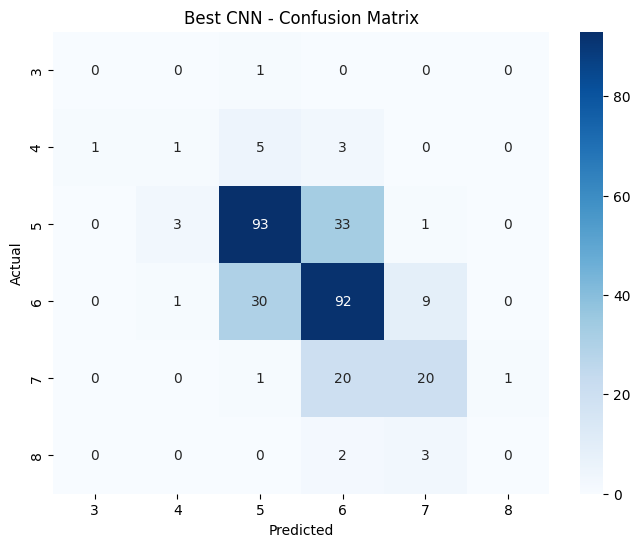


Classification Report for Best CNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.10      0.13        10
           5       0.72      0.72      0.72       130
           6       0.61      0.70      0.65       132
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.36      0.33      0.34       320
weighted avg       0.63      0.64      0.63       320



In [55]:
# import the best parameters

best_filters1 = 128
best_filters2 = 256
best_kernel_size1 = 4
best_kernel_size2 = 5
best_rate1 = 0.2
best_rate2 = 0.3
best_n_neurons = 100
best_batch_size = 32
# epochs_hist = 50    # stays the same


# ---------------------- Prepare Data ----------------------
from tensorflow.keras.utils import to_categorical # Import to_categorical

unique_quality_levels = sorted(y.unique())
quality_map = {level: i for i, level in enumerate(unique_quality_levels)}
y_train_mapped = y_train.map(quality_map)
y_test_mapped = y_test.map(quality_map)
y_train_onehot = to_categorical(y_train_mapped, num_classes=len(unique_quality_levels))
y_test_onehot = to_categorical(y_test_mapped, num_classes=len(unique_quality_levels))
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


# Evaluate the best CNN model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense # Import other necessary layers

# Rebuild and train model with best hyperparameters
model = Sequential()
model.add(Conv1D(filters=best_filters1, kernel_size=best_kernel_size1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(Dropout(best_rate1))
model.add(Conv1D(filters=best_filters2, kernel_size=best_kernel_size2, activation='relu'))
model.add(Dropout(best_rate2))
model.add(Flatten())
model.add(Dense(best_n_neurons, activation='relu'))
model.add(Dense(len(unique_quality_levels), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_cnn, y_train_onehot, epochs=50, batch_size=best_batch_size,
          validation_data=(X_test_cnn, y_test_onehot), verbose=0)

# Predict
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\n✅ Final CNN Test Accuracy with Best Hyperparameters: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_quality_levels,
            yticklabels=unique_quality_levels)
plt.title("Best CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report for Best CNN:")
print(classification_report(y_true, y_pred, target_names=[str(x) for x in unique_quality_levels]))

# Tabnet

In [57]:
%%capture

# 1. Install PyTorch Tabnet
!pip install pytorch-tabnet

In [58]:
# 3. Build and train the TabNet model
from pytorch_tabnet.tab_model import TabNetClassifier

# We need to map the target variable to integers starting from 0 for TabNet
# Get unique quality levels and map them to integers starting from 0
unique_quality_levels = sorted(y.unique())
quality_map = {level: i for i, level in enumerate(unique_quality_levels)}

y_train_mapped = y_train.map(quality_map)
y_test_mapped = y_test.map(quality_map)


# Define the TabNet model
# We need to specify the input dimension (number of features) and output dimension (number of classes)
tabnet_model = TabNetClassifier(
    verbose=0,
    # Other hyperparameters can be tuned for better performance
)

# Train the TabNet model
# Use the mapped integer labels for training
tabnet_model.fit(X_train.values, y_train_mapped.values,
                  eval_set=[(X_test.values, y_test_mapped.values)],
                  patience=10, max_epochs=100)


Early stopping occurred at epoch 67 with best_epoch = 57 and best_val_0_accuracy = 0.59375


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!




--- Evaluation for TabNet ---
Accuracy: 0.5938

Confusion Matrix for TabNet:


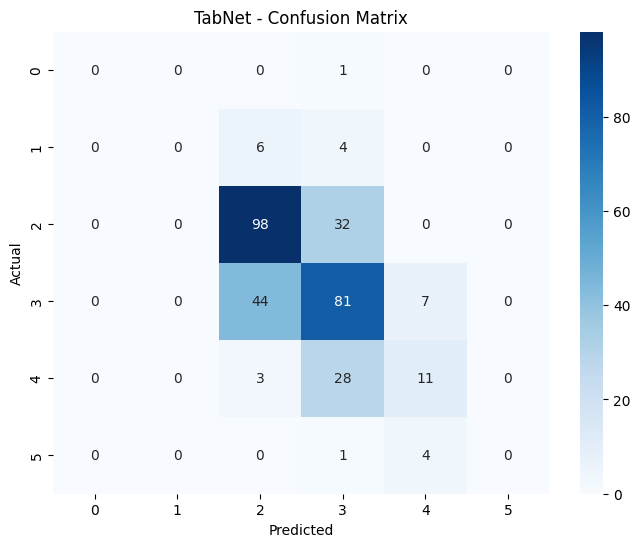


Classification Report for TabNet:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.75      0.70       130
           6       0.55      0.61      0.58       132
           7       0.50      0.26      0.34        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.28      0.27      0.27       320
weighted avg       0.56      0.59      0.57       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [59]:
# 4. Make predictions
y_pred_tabnet_mapped = tabnet_model.predict(X_test.values)

# 5. Convert predictions to original quality levels
# We need the mapping from integer labels back to original quality levels
# This was created in the CNN cell: unique_quality_levels
predicted_quality_levels_tabnet = [unique_quality_levels[i] for i in y_pred_tabnet_mapped]

# 6. Evaluate the model
# Use the evaluate_model function with the original quality levels
evaluate_model(y_test, predicted_quality_levels_tabnet, "TabNet")

# Wide and Deep Learning (W&DL)

In [61]:
# 2. Prepare data for W&DL
# For this dataset, we can use all features for both the wide and deep components.
# In more complex scenarios, you might choose a subset of features for the wide part
# (e.g., categorical features or interactions) and the rest for the deep part.

X_train_wide = X_train.copy()
X_test_wide = X_test.copy()

X_train_deep = X_train.copy()
X_test_deep = X_test.copy()

# The target variable y_train and y_test are already in the correct format (original quality levels)
# for evaluation with evaluate_model.
# For training with Keras, we need to one-hot encode the target variable, similar to the CNN.

from tensorflow.keras.utils import to_categorical

# Get unique quality levels and map them to integers starting from 0
unique_quality_levels = sorted(y.unique())
quality_map = {level: i for i, level in enumerate(unique_quality_levels)}

y_train_mapped = y_train.map(quality_map)
y_test_mapped = y_test.map(quality_map)

y_train_onehot = to_categorical(y_train_mapped, num_classes=len(unique_quality_levels))
y_test_onehot = to_categorical(y_test_mapped, num_classes=len(unique_quality_levels))

In [62]:
# 3. Define the Wide and Deep model architecture
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate

# Define the number of input features
wide_input_shape = X_train_wide.shape[1]
deep_input_shape = X_train_deep.shape[1]
output_units = len(unique_quality_levels)

# Define the wide component
wide_input = Input(shape=(wide_input_shape,), name='wide_input')
# For simplicity, the wide part is a single dense layer (can be expanded)
wide_output = Dense(output_units, activation='softmax', name='wide_output')(wide_input)

# Define the deep component
deep_input = Input(shape=(deep_input_shape,), name='deep_input')
deep_layer_1 = Dense(128, activation='relu')(deep_input)
deep_layer_2 = Dense(64, activation='relu')(deep_layer_1)
deep_layer_3 = Dense(32, activation='relu')(deep_layer_2)
deep_output = Dense(output_units, activation='softmax', name='deep_output')(deep_layer_3)

# Combine the wide and deep components
# Concatenate the outputs of the wide and deep components (before the final output layer)
combined_input = concatenate([wide_input, deep_layer_3])
combined_output = Dense(output_units, activation='softmax', name='combined_output')(combined_input)


# Create the Wide and Deep model
wide_and_deep_model = Model(inputs=[wide_input, deep_input], outputs=combined_output)

# Print the model summary
wide_and_deep_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      1,536 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 43)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_output     │ (None, 6)         │        264 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,136 (47.41 KB)

 Trainable params: 12,136 (47.41 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# 4. Compile the model
wide_and_deep_model.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

In [64]:
# 5. Train the model
# When training, provide inputs for both the wide and deep branches
history_wdl = wide_and_deep_model.fit([X_train_wide, X_train_deep], y_train_onehot,
                                      epochs=100,
                                      batch_size=32,
                                      validation_data=([X_test_wide, X_test_deep], y_test_onehot),
                                      verbose=0)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Evaluation for Wide and Deep Learning ---
Accuracy: 0.6281

Confusion Matrix for Wide and Deep Learning:


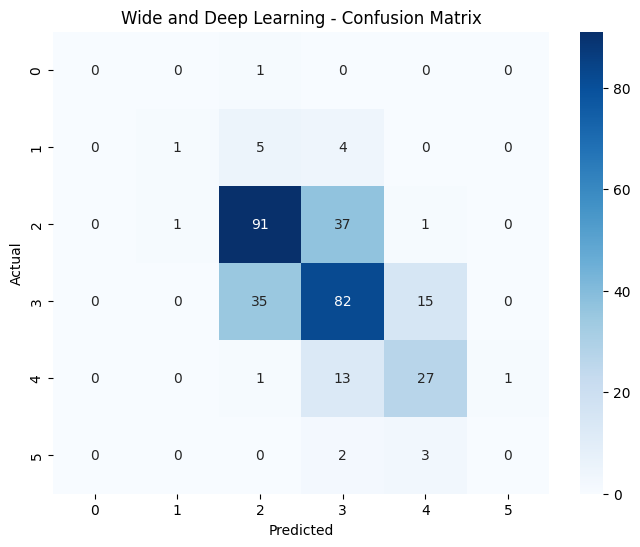


Classification Report for Wide and Deep Learning:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.68      0.70      0.69       130
           6       0.59      0.62      0.61       132
           7       0.59      0.64      0.61        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.39      0.34      0.35       320
weighted avg       0.62      0.63      0.62       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [65]:
# 6. Make predictions
y_pred_wdl_probs = wide_and_deep_model.predict([X_test_wide, X_test_deep])
y_pred_wdl_mapped = np.argmax(y_pred_wdl_probs, axis=1)

# 7. Convert predictions to original quality levels
predicted_quality_levels_wdl = [unique_quality_levels[i] for i in y_pred_wdl_mapped]

# Evaluate the model
evaluate_model(y_test, predicted_quality_levels_wdl, "Wide and Deep Learning")

# Conclusions

In [66]:
%reset -f

import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex, rgb_to_hsv
import matplotlib.pyplot as plt # Import pyplot for colormaps

# 1. Data
data = {
    'Model': ['kNN', 'Random Forest', 'MLP', 'DNN', 'CNN', 'Tabnet', 'W&DL'],
    'Accuracy': [0.6188, 0.6625, 0.6594, 0.6656, 0.6250, 0.5938, 0.6562],
    'Execution Time': ['13 seconds', '34 seconds', '≈ One hour', '≈ Several hours', '≈ One hour', '34 seconds', '54 seconds']
}
df = pd.DataFrame(data)

# 2. Colormaps
cmap = cm.get_cmap('YlGnBu')
acc_norm = Normalize(vmin=df['Accuracy'].min(), vmax=df['Accuracy'].max())
exec_order = ['Few seconds', 'Few minutes', 'One hour', 'Several hours'] # Define the order for execution time categories
exec_norm = Normalize(vmin=0, vmax=len(exec_order) - 1)

# 3. Contrast-based text color
def get_text_color_from_rgb(rgb):
    hsv = rgb_to_hsv(rgb[:3])
    return 'black' if hsv[2] > 0.6 else 'white'

# 4. Accuracy coloring (INVERTED)
def color_accuracy(val):
    norm_val = 1 - acc_norm(val)  # invert the color scale
    rgb = cmap(norm_val)
    color = to_hex(rgb)
    text_color = get_text_color_from_rgb(rgb)
    return f'background-color: {color}; color: {text_color}'

# 5. Execution time coloring (normal order)
def color_execution_time(val):
    # Map specific time strings to general categories for coloring
    mapped_val = None
    if 'seconds' in val:
        # Check for specific seconds values or group them
        if val in ['13 seconds', '34 seconds']:
             mapped_val = 'Few seconds'
        elif val == '54 seconds':
            mapped_val = 'Few minutes' # Assuming 54 seconds is closer to few minutes in this context
        else:
             mapped_val = 'Few seconds' # Default for other seconds values

    elif 'minutes' in val:
        mapped_val = 'Few minutes'
    elif 'One hour' in val:
        mapped_val = 'One hour'
    elif 'Several hours' in val:
        mapped_val = 'Several hours'

    if mapped_val in exec_order:
        idx = exec_order.index(mapped_val)
        rgb = cmap(exec_norm(idx))
        color = to_hex(rgb)
        text_color = get_text_color_from_rgb(rgb)
        return f'background-color: {color}; color: {text_color}'
    else:
        return '' # No coloring if not mapped to a category

# 6. Style and display
def style_table(df):
    return (
        df.style
        .applymap(color_accuracy, subset=['Accuracy'])
        .applymap(color_execution_time, subset=['Execution Time'])
        .format({'Accuracy': '{:.4f}'})
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center'), ('font-size', '14pt')]},
            {'selector': 'td', 'props': [('font-size', '14pt'), ('padding', '10px 15px')]},
        ])
        .hide(axis='index')  # hides row numbers
    )

style_table(df)

/tmp/ipython-input-2503538153.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-2503538153.py:68: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.

/tmp/ipython-input-2503538153.py:69: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



Model,Accuracy,Execution Time
kNN,0.6188,13 seconds
Random Forest,0.6625,34 seconds
MLP,0.6594,≈ One hour
DNN,0.6656,≈ Several hours
CNN,0.6250,≈ One hour
Tabnet,0.5938,34 seconds
W&DL,0.6562,54 seconds
